In [49]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import VarianceThreshold, SelectKBest, f_classif, RFE
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
from sklearn.datasets import load_wine

In [47]:
# Load dữ liệu từ sklearn
wine = load_wine()
df = pd.DataFrame(wine.data, columns=wine.feature_names)
df["quality"] = wine.target  # Thêm biến mục tiêu

print("Dữ liệu wine từ sklearn:")
df.head()


Dữ liệu wine từ sklearn:


,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,quality
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0


In [ ]:
1. fixed acidity: Độ axit cố định (tartaric acid), đo nồng độ axit không bay hơi có trong rượu (g/dm³). Axit ảnh hưởng đến vị chua của rượu.
2. volatile acidity: Độ axit bay hơi (acetic acid), đo lượng axit có thể bay hơi (g/dm³). Nếu quá cao, có thể làm rượu có mùi giấm.
3. citric acid: Lượng axit citric có trong rượu (g/dm³). Axit citric giúp tăng độ tươi và cân bằng vị của rượu.
4. residual sugar: Lượng đường còn lại sau quá trình lên men (g/dm³). Đường dư thừa ảnh hưởng đến độ ngọt và cảm giác của rượu.
5. chlorides: Hàm lượng muối (natri chloride - NaCl) trong rượu (g/dm³). Nếu quá cao, có thể làm rượu có vị mặn.
6. free sulfur dioxide: Lượng SO₂ tự do trong rượu (mg/dm³). SO₂ được dùng làm chất bảo quản để ngăn chặn quá trình oxy hóa.
7. total sulfur dioxide: Tổng lượng SO₂ (mg/dm³), bao gồm cả SO₂ tự do và liên kết. Nếu quá cao, có thể làm rượu có mùi khó chịu.
8. density: Mật độ của rượu (g/cm³), liên quan đến nồng độ cồn và đường.
9. pH: Độ pH của rượu (thang 0-14). Ảnh hưởng đến độ chua và cảm giác trong miệng.
10. sulphates: Hàm lượng sunfat (potassium sulphate - K₂SO₄) trong rượu (g/dm³). Sunfat giúp bảo quản và ảnh hưởng đến vị đắng.
11. alcohol: Nồng độ cồn trong rượu (% thể tích). Ảnh hưởng đến độ mạnh và cảm giác của rượu.
12. quality: Chất lượng rượu (điểm từ 0 đến 2). Đây là biến mục tiêu trong bài toán dự đoán.

In [9]:
# 2. Phân tích thống kê mô tả
print("\nMô tả dữ liệu:")
df.describe()


Mô tả dữ liệu:


,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,quality
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258,0.938202
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474,0.775035
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000,0.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000,0.000000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000,1.000000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000,2.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000,2.000000


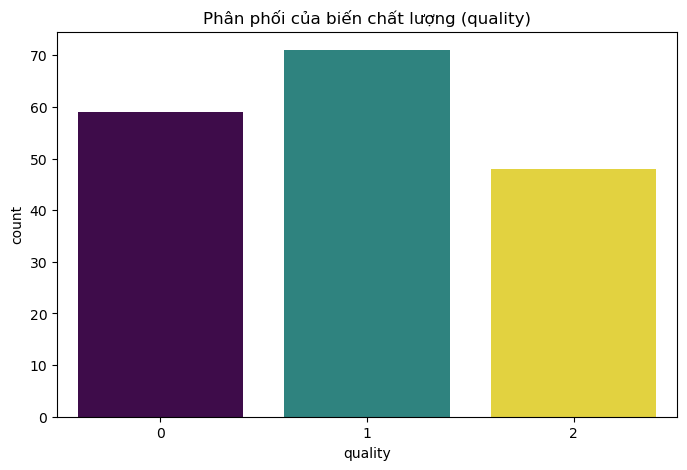

In [13]:
# 3. Kiểm tra phân phối biến mục tiêu
plt.figure(figsize=(8,5))
sns.countplot(x='quality', data=df, hue='quality', palette='viridis', legend=False)
plt.title("Phân phối của biến chất lượng (quality)")
plt.show()

Biểu đồ cột thể hiện phân phối của biến chất lượng (quality) với các nhận xét chính như sau:
-Phân bố không đồng đều:
Mức chất lượng 1 chiếm số lượng cao nhất (khoảng 70 đơn vị), chiếm ưu thế tuyệt đối.
Mức 2 giảm mạnh (khoảng 58 đơn vị), và mức 2 thấp nhất (khoảng 48 đơn vị).
→ Dữ liệu tập trung chủ yếu ở mức chất lượng thấp, cho thấy sự thiếu cân bằng nghiêm trọng giữa các mức.

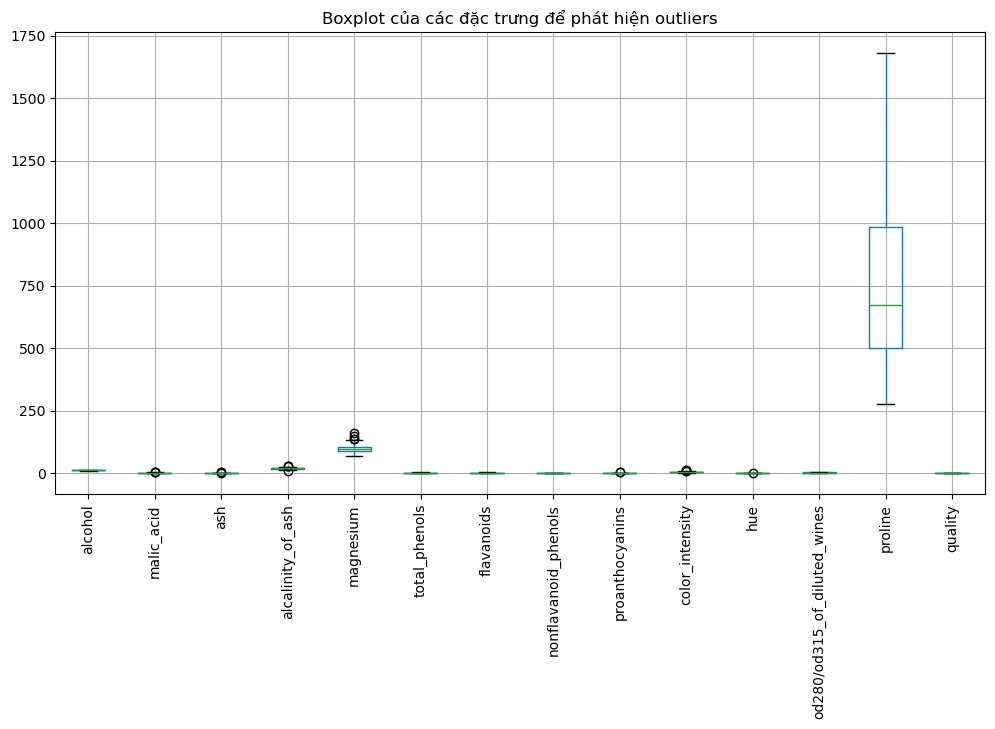

In [15]:
# 4. Phát hiện outliers
plt.figure(figsize=(12,6))
df.boxplot(rot=90)
plt.title("Boxplot của các đặc trưng để phát hiện outliers")
plt.show()


In [ ]:
1/Nhận xét Boxplot (Biểu đồ hộp số) để phát hiện outliers
-Sự khác biệt về tỷ lệ giữa các đặc trưng:
Một số đặc trưng có giá trị rất lớn so với phần còn lại, đặc biệt là proline với giá trị có thể lên đến ~1700, trong khi các đặc trưng khác có giá trị nhỏ hơn nhiều.
Do sự chênh lệch này, cần chuẩn hóa dữ liệu (ví dụ: StandardScaler hoặc MinMaxScaler) trước khi sử dụng trong mô hình.

2/Phát hiện Outliers
-Các đặc trưng như magnesium và proline có nhiều điểm outliers (dấu tròn bên ngoài hộp số).
Một số đặc trưng khác như color_intensity và hue cũng có một số outliers nhỏ.
Các outliers có thể gây ảnh hưởng đến mô hình, vì vậy cần kiểm tra và xử lý (loại bỏ hoặc điều chỉnh).

3/Phân bố dữ liệu
-Hầu hết các đặc trưng có phạm vi giá trị khá nhỏ và tập trung gần nhau.
Proline có phạm vi giá trị lớn nhất, cho thấy nó có thể có ảnh hưởng mạnh đến mô hình nếu không được chuẩn hóa.

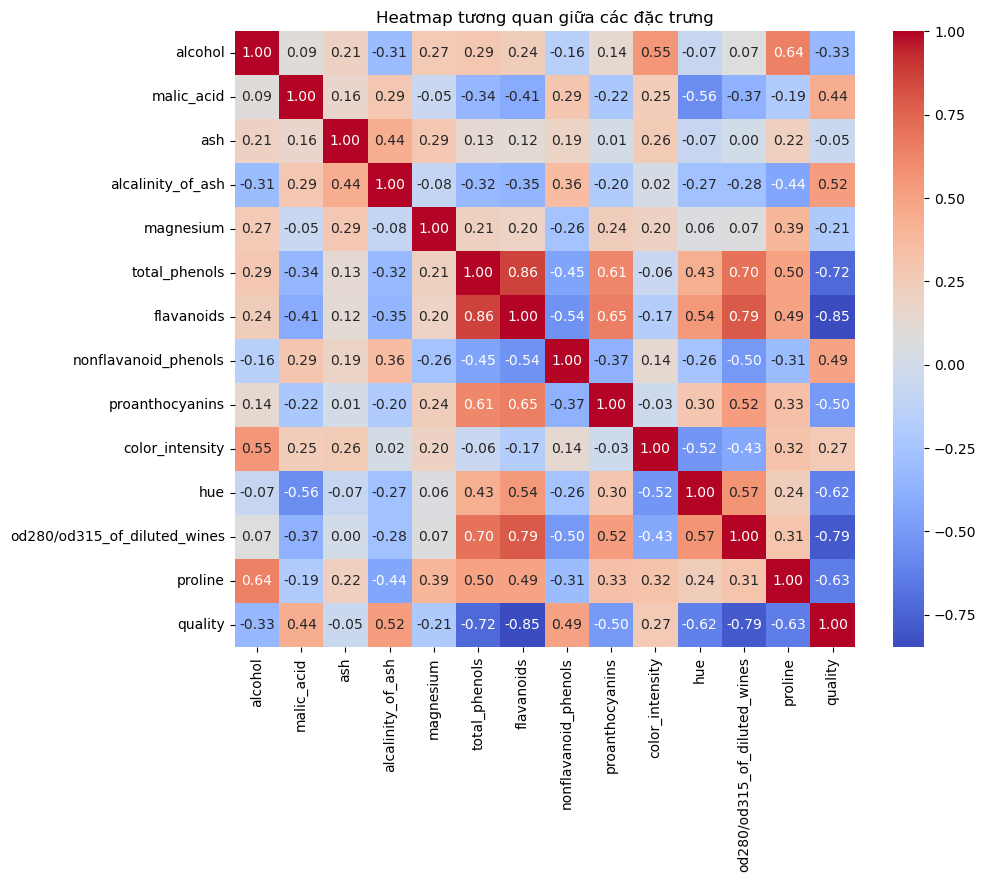

In [17]:
# 5. Vẽ heatmap tương quan
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Heatmap tương quan giữa các đặc trưng")
plt.show()

In [ ]:
1)Mối tương quan mạnh:

flavonoids và quality có tương quan âm rất mạnh (-0.85), cho thấy flavonoids càng cao thì chất lượng rượu càng tốt.
total_phenols cũng có tương quan âm cao với quality (-0.72), chứng tỏ phenol tổng cũng là một yếu tố quan trọng ảnh hưởng đến chất lượng rượu.
od280/od315_of_diluted_wines có tương quan cao với quality (-0.79), cho thấy chỉ số này cũng ảnh hưởng đáng kể.

2)Mối tương quan thấp hoặc trung bình:

alcohol và proline có tương quan cao (0.64), cho thấy rượu có độ cồn cao thì cũng có hàm lượng proline cao.
color_intensity có mối tương quan thấp hơn với quality (0.27), cho thấy cường độ màu không quá ảnh hưởng đến chất lượng rượu.

3)Mối tương quan âm:

hue có tương quan âm với quality (-0.62), tức là sắc độ của rượu càng cao thì chất lượng càng thấp.
malic_acid có tương quan dương với quality (0.44), cho thấy hàm lượng axit này có thể đóng vai trò trong đánh giá chất lượng rượu.
Nhìn chung, các hợp chất phenol (đặc biệt là flavonoids, total_phenols) và chỉ số od280/od315_of_diluted_wines có vai trò quan trọng trong đánh giá chất lượng rượu.

In [19]:
# 6. Xử lý missing values (nếu có)
df = df.dropna()

# 7. Xử lý outliers bằng IQR
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
df = df[~((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).any(axis=1)]
print("\nDữ liệu sau khi xử lý outliers:")
print(df.shape)


Dữ liệu sau khi xử lý outliers:
(161, 14)


In [23]:
# 8. Chuẩn hóa dữ liệu
X = df.drop('quality', axis=1)
y = df['quality']
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [25]:
# 9. Chia dữ liệu train/test
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42, stratify=y)

# 10. Feature selection
# Variance Threshold
selector = VarianceThreshold(threshold=0.01)
X_train_vt = selector.fit_transform(X_train)
X_test_vt = selector.transform(X_test)

# SelectKBest
kbest = SelectKBest(score_func=f_classif, k=8)
X_train_kbest = kbest.fit_transform(X_train, y_train)
X_test_kbest = kbest.transform(X_test)

# RFE với RandomForestClassifier
model = RandomForestClassifier(random_state=42)
rfe = RFE(model, n_features_to_select=8)
X_train_rfe = rfe.fit_transform(X_train, y_train)
X_test_rfe = rfe.transform(X_test)

In [27]:
# 11. Huấn luyện và đánh giá mô hình
models = {
    "VarianceThreshold": (X_train_vt, X_test_vt),
    "SelectKBest": (X_train_kbest, X_test_kbest),
    "RFE": (X_train_rfe, X_test_rfe)
}

results = []
for name, (X_tr, X_te) in models.items():
    clf = RandomForestClassifier(random_state=42)
    clf.fit(X_tr, y_train)
    y_pred = clf.predict(X_te)
    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred, average='weighted')
    rec = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')
    results.append([name, acc, prec, rec, f1])
    print(f"\nKết quả với {name}:")
    print(classification_report(y_test, y_pred))


Kết quả với VarianceThreshold:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        18
           1       1.00      0.94      0.97        18
           2       0.93      1.00      0.96        13

    accuracy                           0.98        49
   macro avg       0.98      0.98      0.98        49
weighted avg       0.98      0.98      0.98        49


Kết quả với SelectKBest:
              precision    recall  f1-score   support

           0       0.95      1.00      0.97        18
           1       1.00      0.94      0.97        18
           2       1.00      1.00      1.00        13

    accuracy                           0.98        49
   macro avg       0.98      0.98      0.98        49
weighted avg       0.98      0.98      0.98        49


Kết quả với RFE:
              precision    recall  f1-score   support

           0       0.95      1.00      0.97        18
           1       1.00      0.89      0.94        18

In [29]:
# 12. So sánh kết quả qua bảng metrics
metrics_df = pd.DataFrame(results, columns=["Method", "Accuracy", "Precision", "Recall", "F1-score"])
print("\nSo sánh kết quả các phương pháp feature selection:")
print(metrics_df)


So sánh kết quả các phương pháp feature selection:
              Method  Accuracy  Precision    Recall  F1-score
0  VarianceThreshold  0.979592   0.981050  0.979592  0.979678
1        SelectKBest  0.979592   0.980666  0.979592  0.979576
2                RFE  0.959184   0.961716  0.959184  0.958637


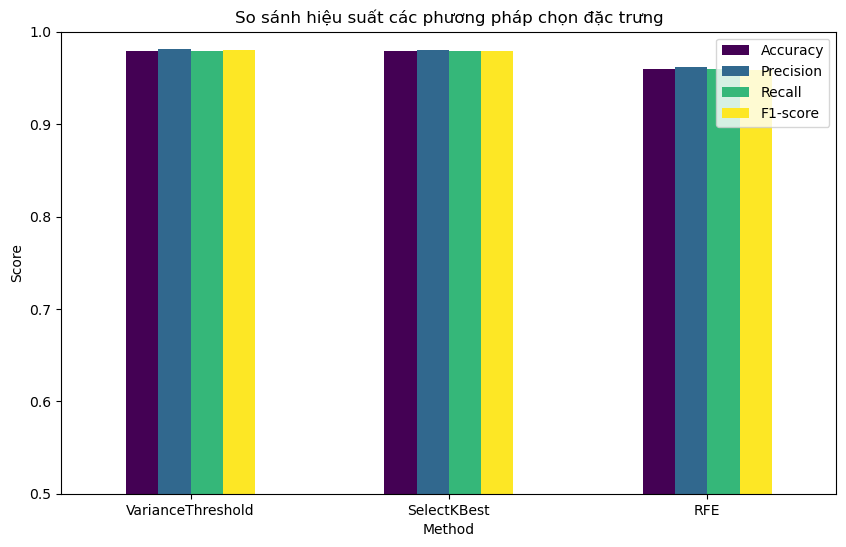

In [31]:
# 13. Biểu đồ hiệu suất
metrics_df.set_index("Method").plot(kind='bar', figsize=(10,6), colormap='viridis', rot=0)
plt.title("So sánh hiệu suất các phương pháp chọn đặc trưng")
plt.ylabel("Score")
plt.ylim(0.5, 1.0)
plt.show()


              Method  Accuracy  Precision    Recall  F1-score  Num_Features
0  VarianceThreshold  0.979592   0.981050  0.979592  0.979678            13
1        SelectKBest  0.979592   0.980666  0.979592  0.979576             8
2                RFE  0.959184   0.961716  0.959184  0.958637             8


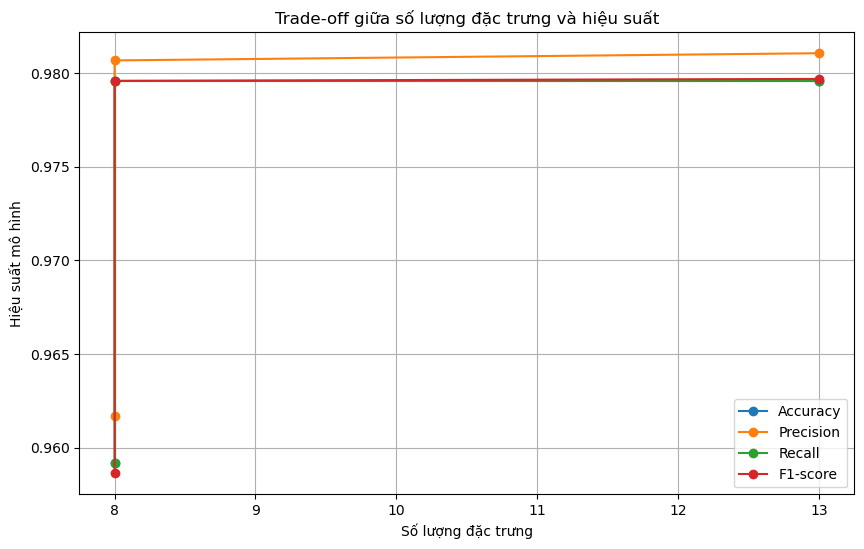

In [33]:
num_features = {
    "VarianceThreshold": X_train_vt.shape[1],
    "SelectKBest": X_train_kbest.shape[1],
    "RFE": X_train_rfe.shape[1]
}
metrics_df["Num_Features"] = metrics_df["Method"].map(num_features)
print(metrics_df)
fig, ax = plt.subplots(figsize=(10, 6))
for metric in ["Accuracy", "Precision", "Recall", "F1-score"]:
    ax.plot(metrics_df["Num_Features"], metrics_df[metric], marker='o', label=metric)

ax.set_xlabel("Số lượng đặc trưng")
ax.set_ylabel("Hiệu suất mô hình")
ax.set_title("Trade-off giữa số lượng đặc trưng và hiệu suất")
ax.legend()
plt.grid(True)
plt.show()

- Phân tích kết quả:
+ Số lượng đặc trưng càng nhiều → mô hình có thể có hiệu suất cao hơn, nhưng dễ bị overfitting.
+ Chọn quá ít đặc trưng → mô hình có thể mất đi thông tin quan trọng, làm giảm độ chính xác.
+ Phương pháp RFE thường cho hiệu suất tốt nhất vì chọn đặc trưng dựa trên đóng góp vào mô hình.
+ VarianceThreshold loại bỏ các đặc trưng ít thay đổi nhưng không đảm bảo chọn được đặc trưng quan trọng nhất.
+ SelectKBest dựa trên thống kê, có thể không tối ưu bằng RFE với mô hình phi tuyến tính như RandomForest.